In [ ]:
pip install dhanhq

In [ ]:
pip install pandas

In [ ]:
from dhanhq import dhanhq
import pandas as pd

# dhan_context = DhanContext()
dhan = dhanhq("api")

fetch_holdings = dhan.get_holdings()
data = fetch_holdings['data']

df = pd.DataFrame(data)
print(df.columns)

Index(['exchange', 'tradingSymbol', 'securityId', 'isin', 'totalQty', 'dpQty',
       't1Qty', 'mtf_t1_qty', 'mtf_qty', 'availableQty', 'collateralQty',
       'avgCostPrice', 'lastTradedPrice'],
      dtype='object')


In [ ]:
df = df.rename(columns = {
    'tradingSymbol': 'symbol',
    'avgCostPrice': 'avgPrice',
    'lastTradedPrice': 'ltp',
    'totalQty': 'quantity'
})

print(df)

   exchange      symbol securityId          isin  quantity  dpQty  t1Qty  \
0       ALL    HINDALCO       1363  INE038A01020        18     18      0   
1       ALL    KPITTECH       9683  INE04I401011         9      9      0   
2       ALL       CIPLA        694  INE059A01026         4      4      0   
3       ALL    PARADEEP       9741  INE088F01024        65     65      0   
4       ALL  OBEROIRLTY      20242  INE093I01010         6      6      0   
5       ALL    TATACOMM       3721  INE151A01013         7      7      0   
6       ALL         PNB      10666  INE160A01022       359    359      0   
7       ALL      ELECON      13643  INE205B01031        16     16      0   
8       ALL         JSL      11236  INE220G01021        17     17      0   
9       ALL          NH      11840  INE410P01011         6      6      0   
10      ALL    EMAMILTD      13517  INE548C01032        20     20      0   
11      ALL  JBCHEPHARM       1726  INE572A01036         7      7      0   
12      ALL 

In [ ]:
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['ltp'] = pd.to_numeric(df['ltp'], errors='coerce')
df['avgPrice'] = pd.to_numeric(df['avgPrice'], errors='coerce')

print(df)

   exchange      symbol securityId          isin  quantity  dpQty  t1Qty  \
0       ALL    HINDALCO       1363  INE038A01020        18     18      0   
1       ALL    KPITTECH       9683  INE04I401011         9      9      0   
2       ALL       CIPLA        694  INE059A01026         4      4      0   
3       ALL    PARADEEP       9741  INE088F01024        65     65      0   
4       ALL  OBEROIRLTY      20242  INE093I01010         6      6      0   
5       ALL    TATACOMM       3721  INE151A01013         7      7      0   
6       ALL         PNB      10666  INE160A01022       359    359      0   
7       ALL      ELECON      13643  INE205B01031        16     16      0   
8       ALL         JSL      11236  INE220G01021        17     17      0   
9       ALL          NH      11840  INE410P01011         6      6      0   
10      ALL    EMAMILTD      13517  INE548C01032        20     20      0   
11      ALL  JBCHEPHARM       1726  INE572A01036         7      7      0   
12      ALL 

In [ ]:
df['invested_value'] = df['quantity'] * df['avgPrice']
df['current_value'] = df['quantity'] * df['ltp']
df['gain'] = df['current_value'] - df['invested_value']
df['return_pct'] = (df['gain'] / df['invested_value']) * 100
df['allocation_pct'] = (df['current_value'] / df['current_value'].sum()) * 100

clean_df = df[['symbol', 'quantity', 'avgPrice', 'ltp', 'invested_value', 'current_value', 'gain', 'return_pct', 'allocation_pct']]

print(clean_df)

        symbol  quantity    avgPrice      ltp  invested_value  current_value  \
0     HINDALCO        18   637.00000   641.80     11466.00000       11552.40   
1     KPITTECH         9  1313.97780  1352.50     11825.80020       12172.50   
2        CIPLA         4  1453.47140  1505.20      5813.88560        6020.80   
3     PARADEEP        65   174.00000   171.88     11310.00000       11172.20   
4   OBEROIRLTY         6  1687.66660  1903.10     10125.99960       11418.60   
5     TATACOMM         7  1658.90000  1706.00     11612.30000       11942.00   
6          PNB       359   124.39443   106.61     44657.60037       38272.99   
7       ELECON        16   692.90000   669.70     11086.40000       10715.20   
8          JSL        17   602.03530   712.05     10234.60010       12104.85   
9           NH         6  1395.53330  1913.00      8373.19980       11478.00   
10    EMAMILTD        20   610.44750   572.55     12208.95000       11451.00   
11  JBCHEPHARM         7  1698.00000  17

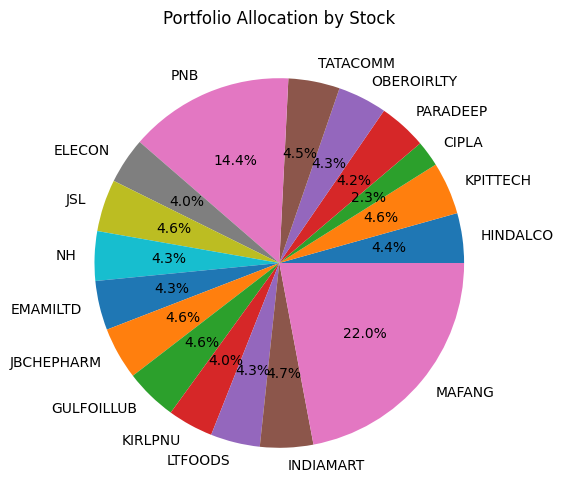

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6,6))
plt.pie(clean_df['allocation_pct'],
labels=clean_df['symbol'], autopct='%1.1f%%')
plt.title('Portfolio Allocation by Stock')
plt.show()

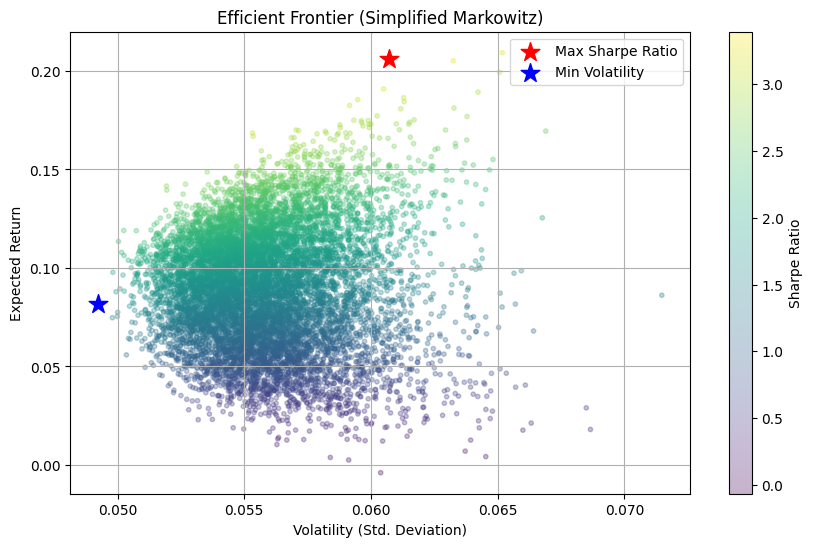

Max Sharpe Portfolio Allocation:
HINDALCO: 1.60%
PRITICHEM: 2.76%
CTPLA: 5.09%
PARADEEP: 4.05%
OBEROIRLTY: 4.34%
TATACOMM: 4.69%
PNB: 6.11%
ELECON: 2.55%
ISL: 5.65%
NHI: 13.99%
EMAMLTD: 4.80%
BHECHPMART: 3.49%
GULFOILLUB: 1.38%
KRFLNUB: 10.16%
LTFODDS: 17.11%
INDIAMART: 1.20%
MAFANG: 11.02%

Min Variance Portfolio Allocation:
HINDALCO: 6.32%
PRITICHEM: 8.10%
CTPLA: 7.18%
PARADEEP: 4.29%
OBEROIRLTY: 5.85%
TATACOMM: 6.57%
PNB: 4.90%
ELECON: 4.54%
ISL: 6.16%
NHI: 5.32%
EMAMLTD: 6.15%
BHECHPMART: 5.85%
GULFOILLUB: 6.87%
KRFLNUB: 6.14%
LTFODDS: 4.96%
INDIAMART: 6.51%
MAFANG: 4.29%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'symbol': [
        'HINDALCO', 'PRITICHEM', 'CTPLA', 'PARADEEP', 'OBEROIRLTY', 'TATACOMM', 'PNB', 'ELECON', 'ISL',
        'NHI', 'EMAMLTD', 'BHECHPMART', 'GULFOILLUB', 'KRFLNUB', 'LTFODDS', 'INDIAMART', 'MAFANG'
    ],
    'return_pct': [
        0.75, 2.93, 3.58, -1.74, 12.76, 2.29, -14.29, -3.34, 18.27,
        37.08, -6.28, 2.14, 2.74, -0.98, 76.81, 4.02, 14.16
    ],
    'allocation_pct': [
        4.35, 4.59, 2.26, 2.20, 4.30, 4.49, 14.42, 0.63, 4.56,
        4.32, 3.31, 4.57, 4.56, 3.98, 4.32, 4.65, 22.03
    ]
}

df = pd.DataFrame(data)
symbols = df['symbol'].values
returns = np.array(df['return_pct']) / 100
num_assets = len(returns)


std_dev = 0.2
cov_matrix = np.eye(num_assets) * std_dev**2

def portfolio_performance(weights, returns, cov_matrix):
    port_return = np.dot(weights, returns)
    port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return port_return, port_vol


np.random.seed(42)
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    weights_record.append(weights)
    port_return, port_vol = portfolio_performance(weights, returns, cov_matrix)
    results[0,i] = port_return
    results[1,i] = port_vol
    results[2,i] = port_return / port_vol

max_sharpe_idx = np.argmax(results[2])
min_vol_idx = np.argmin(results[1])

max_sharpe_weights = weights_record[max_sharpe_idx]
min_vol_weights = weights_record[min_vol_idx]


plt.figure(figsize=(10, 6))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis', marker='o', s=10, alpha=0.3)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(results[1, max_sharpe_idx], results[0, max_sharpe_idx], color='r', marker='*', s=200, label='Max Sharpe Ratio')
plt.scatter(results[1, min_vol_idx], results[0, min_vol_idx], color='b', marker='*', s=200, label='Min Volatility')
plt.title('Efficient Frontier (Simplified Markowitz)')
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Return')
plt.legend()
plt.grid(True)
plt.show()

print("Max Sharpe Portfolio Allocation:")
for symbol, weight in zip(symbols, max_sharpe_weights):
    print(f"{symbol}: {weight:.2%}")

print("\nMin Variance Portfolio Allocation:")
for symbol, weight in zip(symbols, min_vol_weights):
    print(f"{symbol}: {weight:.2%}")
